In [37]:
import pandas as pd
import numpy as np

In [38]:
gg_df = pd.read_csv('Data/golden_globe_awards.csv')
gg_df = gg_df[(gg_df['year_film'] >= 1960) & 
              (gg_df['year_film'] <= 2014) & 
              (~gg_df['film'].isna())].reset_index(drop=True)

gg_df

,year_film,year_award,ceremony,category,nominee,film,win
0,1960,1961,18,Best Performance by an Actress in a Motion Pic...,Greer Garson,Sunrise at Campobello,True
1,1960,1961,18,Best Performance by an Actress in a Motion Pic...,Doris Day,Midnight Lace,False
2,1960,1961,18,Best Performance by an Actress in a Motion Pic...,Nancy Kwan,The World Of Suzie Wong,False
3,1960,1961,18,Best Performance by an Actress in a Motion Pic...,Jean Simmons,Elmer Gantry,False
4,1960,1961,18,Best Performance by an Actress in a Motion Pic...,Elizabeth Taylor,Butterfield 8,False
...,...,...,...,...,...,...,...
5244,2014,2015,72,Best Performance by an Actress in a Supporting...,Allison Janney,Mom,False
5245,2014,2015,72,Best Performance by an Actor in a Supporting R...,Matt Bomer,The Normal Heart,True
5246,2014,2015,72,Best Performance by an Actor in a Supporting R...,Bill Murray,Olive Kitteridge,False
5247,2014,2015,72,Best Performance by an Actor in a Supporting R...,Jon Voight,Ray Donovan,False


In [39]:
gg_df['category'].unique()

array(['Best Performance by an Actress in a Motion Picture - Drama',
       'Best Performance by an Actor in a Motion Picture - Drama',
       'Best Performance by an Actor in a Motion Picture - Musical or Comedy',
       'Best Performance by an Actress in a Supporting Role in any Motion Picture',
       'Best Performance by an Actor in a Supporting Role in any Motion Picture',
       'Best Director - Motion Picture',
       'Best Original Score - Motion Picture', 'Picture - Musical',
       'Promoting International Understanding', 'Television Achievement',
       'Special Achievement Award', 'Samuel Goldwyn International Award',
       'New Star Of The Year - Actress', 'New Star Of The Year - Actor',
       'Actress In A Leading Role - Musical Or Comedy',
       'Foreign Film - Foreign Language',
       'Foreign Film - English Language',
       'Best Original Song - Motion Picture',
       'Television Producer/Director', 'Actor In A Television Series',
       'Cinematography - Color',

In [40]:
categories = ['Best Screenplay - Motion Picture',
              'Foreign Film - Foreign Language',
              'Foreign Film - English Language',
              'Best Motion Picture - Foreign Language']

relevant = gg_df[gg_df['category'].isin(categories)].reset_index(drop=True)
# relevant['nominee_list'] = relevant['nominee'].apply(lambda x: [x.strip() for x in x.split(',')])
# relevant['film_list'] = relevant['film'].apply(lambda x: [x.strip() for x in x.split(',')])
# relevant['combined'] = relevant.apply(lambda row: row['nominee_list'] + row['film_list'], axis=1)

relevant

,year_film,year_award,ceremony,category,nominee,film,win
0,1960,1961,18,Foreign Film - Foreign Language,"France, Henri-Georges Clouzot",La vérité (The Truth),True
1,1960,1961,18,Foreign Film - Foreign Language,"Sweden, Ingmar Bergman",The Virgin Spring,True
2,1960,1961,18,Foreign Film - Foreign Language,"United Soviet Socialist Republics, Grigoriy Ch...",Ballad Of A Soldier,False
3,1960,1961,18,Foreign Film - Foreign Language,"France, Alain Resnais",Hiroshima Mon Amour,False
4,1960,1961,18,Foreign Film - Foreign Language,"India, Satyajit Ray",The World Of Apu,False
...,...,...,...,...,...,...,...
571,2014,2015,72,Best Motion Picture - Foreign Language,Leviathan,"Russia, Andrey Zvyagintsev",True
572,2014,2015,72,Best Motion Picture - Foreign Language,Gett: The Trial of Viviane Amsalem,"Israel, Ronit Elkabetz, Shlomi Elkabetz",False
573,2014,2015,72,Best Motion Picture - Foreign Language,Ida,"Poland, Denmark, Pawel Pawlikowski",False
574,2014,2015,72,Best Motion Picture - Foreign Language,Tangerines,"Estonia, Zaza Urushadze",False


In [41]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Predefined list of countries, including those not recognized by spaCy
additional_countries = [
    'West Germany', 'East Germany', 'GDR', 
    'United Soviet Socialist Republics', 'USSR', 
    'United States','USA', 'United Kingdom', 
    'Czechoslovakia', 
    'Yugoslavia', 
    'Burma', 'Myanmar', 
    'Zaire', 'Democratic Republic of the Congo', 
    'Persia', 'Iran', 
    'Siam', 'Thailand', 
    'Ceylon', 'Sri Lanka', 
    'Rhodesia', 'Zimbabwe', 
    'Dutch East Indies', 'Indonesia', 
    'Formosa', 'Taiwan', 
    'Abyssinia', 'Ethiopia', 
    'South Vietnam', 'North Vietnam', 'Vietnam', 
    'British Malaya', 'Malaysia', 
    'British Guiana', 'Guyana', 
    'Dutch Guiana', 'Suriname', 
    'British Honduras', 'Belize', 
    'New Hebrides', 'Vanuatu', 
    'Swaziland', 'Eswatini', 
    'Bechuanaland', 'Botswana', 
    'Basutoland', 'Lesotho', 
    'Northern Rhodesia', 'Zambia', 
    'Southern Rhodesia', 'Zimbabwe', 
    'Tanganyika', 'Tanzania', 
    'East Pakistan', 'Bangladesh', 
    'British Burma', 'Burma', 'Myanmar', 
    'British Ceylon', 'Ceylon', 'Sri Lanka',
    'British Raj', 'India'
]

def is_valid_country(entity, additional_countries):
    # Check if the entity is a recognized country or in the additional countries list
    return entity.label_ == "GPE" and (entity.text in additional_countries or entity.text.isalpha())

def parse_sentence(sentence):
    doc = nlp(sentence)
    countries, people = [], []
    found_non_country = False

    for ent in doc.ents:
        # Check if the entity is a country
        if is_valid_country(ent, additional_countries) and not found_non_country:
            countries.append(ent.text)
        else:
            # Once non-country entity is found, all following entities are considered people
            found_non_country = True
            people.append(ent.text)

    # Manual check for countries in case they are missed by spaCy
    for part in sentence.split(','):
        part = part.strip()
        if part in additional_countries and part not in countries:
            countries.append(part)
        elif part not in countries and not found_non_country:
            found_non_country = True
            if part not in people:
                people.append(part)

    return countries, people

def process_data_fl(sentence):
    parts = [part.strip() for part in sentence.split(',')]
    
    # List structure: countries, people
    if len(parts) > 2:
        # NLP parsing for more complex sentences -> need to determine countries and people
        countries, people = parse_sentence(sentence)
    else:
        # Can directly assign country and person
        countries = [parts[0]]
        people = [parts[1] if len(parts) > 1 else None]
    
    return countries, people

In [42]:
bs_mp = gg_df[gg_df['category'] == 'Best Screenplay - Motion Picture'].copy()
bmp_fl = gg_df[gg_df['category'] == 'Best Motion Picture - Foreign Language'].copy()
ff_fl = gg_df[gg_df['category'] == 'Foreign Film - Foreign Language'].copy()
ff_el = gg_df[gg_df['category'] == 'Foreign Film - English Language'].copy()

# Best Screenplay - Motion Picture
bs_mp['movie_name'] = bs_mp['film'].apply(lambda x: ' '.join(reversed(x.split(','))) if x.find(',') != -1 else x)
bs_mp['people'] = bs_mp['nominee'].apply(lambda x: [x.strip() for x in x.split(',')] if x.find(',') != -1 else [x])
bs_mp['country'] = np.nan

bmp_fl['movie_name'] = bmp_fl['nominee'].apply(lambda x: ' '.join(reversed(x.split(','))) if x.find(',') != -1 else x)
bmp_fl[['country', 'people']] = bmp_fl['film'].apply(lambda x: pd.Series(process_data_fl(x)))

ff_fl['movie_name'] = ff_fl['film'].apply(lambda x: ' '.join(reversed(x.split(','))) if x.find(',') != -1 else x)
ff_fl[['country', 'people']] = ff_fl['nominee'].apply(lambda x: pd.Series(process_data_fl(x)))

ff_el['movie_name'] = ff_el['film'].apply(lambda x: ' '.join(reversed(x.split(','))) if x.find(',') != -1 else x)
ff_el[['country', 'people']] = ff_el['nominee'].apply(lambda x: pd.Series(process_data_fl(x)))


In [43]:
golden_globe_df = pd.concat([bs_mp, bmp_fl, ff_fl, ff_el], axis=0).reset_index(drop=True)

golden_globe_df = golden_globe_df[['year_film', 'year_award', 'ceremony', 'category', 'win', 'movie_name', 'people', 'country']]

# Standardize nan-values
values_to_replace = ['{}', '[]', '', 'NA', 'N/A', '-', 'nan', '\\N']
replace_map = {value: np.nan for value in values_to_replace}
golden_globe_df = golden_globe_df.replace(replace_map)
golden_globe_df = golden_globe_df.applymap(lambda x: np.nan if x == [None] else x)

golden_globe_df['award'] = 'Golden Globe'

golden_globe_df

,year_film,year_award,ceremony,category,win,movie_name,people,country,award
0,1965,1966,23,Best Screenplay - Motion Picture,True,Doctor Zhivago,[Robert Bolt],NaN,Golden Globe
1,1965,1966,23,Best Screenplay - Motion Picture,False,The Agony and The Ecstasy,[Philip Dunne],NaN,Golden Globe
2,1965,1966,23,Best Screenplay - Motion Picture,False,The Collector,[John Kohn],NaN,Golden Globe
3,1965,1966,23,Best Screenplay - Motion Picture,False,A Patch of Blue,[Guy Green],NaN,Golden Globe
4,1965,1966,23,Best Screenplay - Motion Picture,False,The Slender Thread,[Stirling Silliphant],NaN,Golden Globe
...,...,...,...,...,...,...,...,...,...
571,1972,1973,30,Foreign Film - English Language,True,Young Winston,[Richard Attenborough],[United Kingdom],Golden Globe
572,1972,1973,30,Foreign Film - English Language,False,The Ruling Class,[Peter Medak],[United Kingdom],Golden Globe
573,1972,1973,30,Foreign Film - English Language,False,Images,[Robert Altman],[United Kingdom],Golden Globe
574,1972,1973,30,Foreign Film - English Language,False,Living Free,[Jack Couffer],[United Kingdom],Golden Globe


### Oscars Award

In [44]:
import re

def process_name(text):
    text = text.replace(';', ',').replace(', Jr.', ' Jr.,').replace('&', '')
    text = re.sub(r'\s+', ' ', text)
    
    standalone_words = ['by', 'in', 'with', 'for', 'the', 'screen']
    for s in standalone_words: 
        pattern = r'\b' + re.escape(s) + r'\b'
        text = re.sub(pattern, '', text)
        
    separators = ['and']
    for s in separators:
        pattern = r'\b' + re.escape(s) + r'\b'
        text = re.sub(pattern, ',', text)  
    
    checks = ['Written', 'Story', 'Screenplay', 'Dialogue', 'Adaptation']
    for c in checks:
        text = text.replace(c, '')
    
    text = re.sub(r'\s+', ' ', text.strip())
    
    if text.find(',') != -1:
        names = text.split(',')
        names = [x.strip() for x in names if x.strip()]
        return list(set(names))
    else:
        return [text]
    
def process_title(text):
    text = re.sub(r'\s+', ' ', text)
    if text.find('or:') != -1:
        title = text.split('or:')[0]
    elif text.find('or (') != -1:
        title = text.split('or (')[0]
    else:
        title = text
    
    return title    

In [45]:
oscar_df = pd.read_csv('Data/the_oscar_award.csv')

relevant_categories = [x for x in list(oscar_df.category.unique()) if 'WRITING' in x]
oscar_df = oscar_df[(oscar_df['category'].isin(relevant_categories)) & 
                      (oscar_df['year_film'] >= 1960) & 
                      (oscar_df['year_film'] <= 2014)].reset_index(drop=True)

oscar_df['movie_name'] = oscar_df['film'].apply(lambda x: process_title(x))
oscar_df['people'] = oscar_df['name'].apply(lambda x: process_name(x))
oscar_df['country'] = np.nan
oscar_df = oscar_df.rename(columns={'winner': 'win', 'year_ceremony': 'year_award'})
oscar_df = oscar_df[['year_film', 'year_award', 'ceremony', 'category', 'win', 'movie_name', 'people', 'country']]
oscar_df['award'] = 'Oscar / Academy Awards'

oscar_df

,year_film,year_award,ceremony,category,win,movie_name,people,country,award
0,1960,1961,33,WRITING (Screenplay--based on material from an...,True,Elmer Gantry,[Richard Brooks],NaN,Oscar / Academy Awards
1,1960,1961,33,WRITING (Screenplay--based on material from an...,False,Inherit the Wind,"[Harold Jacob Smith, Nedrick Young]",NaN,Oscar / Academy Awards
2,1960,1961,33,WRITING (Screenplay--based on material from an...,False,Sons and Lovers,"[Gavin Lambert, T. E. B. Clarke]",NaN,Oscar / Academy Awards
3,1960,1961,33,WRITING (Screenplay--based on material from an...,False,The Sundowners,[Isobel Lennart],NaN,Oscar / Academy Awards
4,1960,1961,33,WRITING (Screenplay--based on material from an...,False,Tunes of Glory,[James Kennaway],NaN,Oscar / Academy Awards
...,...,...,...,...,...,...,...,...,...
545,2014,2015,87,WRITING (Original Screenplay),True,Birdman,"[Alexander Dinelaris Jr., Armando Bo, Nicolás ...",NaN,Oscar / Academy Awards
546,2014,2015,87,WRITING (Original Screenplay),False,Boyhood,[Richard Linklater],NaN,Oscar / Academy Awards
547,2014,2015,87,WRITING (Original Screenplay),False,Foxcatcher,"[E. Max Frye, Dan Futterman]",NaN,Oscar / Academy Awards
548,2014,2015,87,WRITING (Original Screenplay),False,The Grand Budapest Hotel,"[Wes Anderson, Wes Anderson Hugo Guinness]",NaN,Oscar / Academy Awards


### BAFTA Awards

In [46]:
def standardize_category(category):
    return re.sub(r'\s+in\s+\d{4}$', '', category).strip()

In [47]:
plot_related_categories = [
    'Film | Film From Any Source',
    'Film | United Nations Award - for the best Film embodying one or more of the principles of the United Nations Charter',
    'Film | British Screenplay',
    'Film | Most Promising Newcomer To Film',
    'Film | Screenplay',
    'Film | Adapted Screenplay',
    'Film | Original Screenplay',
    'Film | Alexander Korda Award for the outstanding British Film of the Year',
    'Film | Outstanding British Film',
    'Film | Best Film',
    'Film | Film',
    'Film | Film Not in the English Language',
    'Film | Outstanding British Film',
]

In [48]:
bafta_df = pd.read_csv('Data/bafta_films.csv')

bafta_df['category'] = bafta_df['category'].apply(lambda x: standardize_category(x))

bafta_df = bafta_df[(bafta_df['category'].isin(plot_related_categories)) & 
                    (bafta_df['year'] >= 1960) & 
                    (bafta_df['year'] <= 2014)].reset_index(drop=True)


bafta_df.columns = ['year_award', 'category', 'movie_name', 'people', 'win']
bafta_df['year_film'] = bafta_df['year_award'] - 1
bafta_df['ceremony'] = bafta_df['year_award'] - 1949
bafta_df['people'] = bafta_df['people'].apply(lambda x: x.split(',') if not pd.isna(x) and x.find(',') != -1 else [x])
bafta_df['country'] = np.nan
bafta_df = bafta_df[['year_film', 'year_award', 'ceremony', 'category', 'win', 'movie_name', 'people', 'country']]
bafta_df['award'] = 'BAFTA'


In [49]:
bafta_df

,year_film,year_award,ceremony,category,win,movie_name,people,country,award
0,1959,1960,11,Film | British Screenplay,True,"I'm All Right, Jack","[Frank Harvey, John Boulting, Alan Hackney]",NaN,BAFTA
1,1959,1960,11,Film | British Screenplay,False,Blind Date,"[Ben Barzman, Millard Lampell]",NaN,BAFTA
2,1959,1960,11,Film | British Screenplay,False,Expresso Bongo,[Wolf Mankowitz],NaN,BAFTA
3,1959,1960,11,Film | British Screenplay,False,The Horse's Mouth,[Alec Guinness],NaN,BAFTA
4,1959,1960,11,Film | British Screenplay,False,Look Back In Anger,[Nigel Kneale],NaN,BAFTA
...,...,...,...,...,...,...,...,...,...
560,2000,2001,52,Film | Original Screenplay,True,Almost Famous,[Cameron Crowe],NaN,BAFTA
561,2000,2001,52,Film | Original Screenplay,False,Billy Elliot,[Lee Hall],NaN,BAFTA
562,2000,2001,52,Film | Original Screenplay,False,Erin Brockovich,[Susannah Grant],NaN,BAFTA
563,2000,2001,52,Film | Original Screenplay,False,Gladiator,"[David Franzoni, John Logan, William Nicholson]",NaN,BAFTA


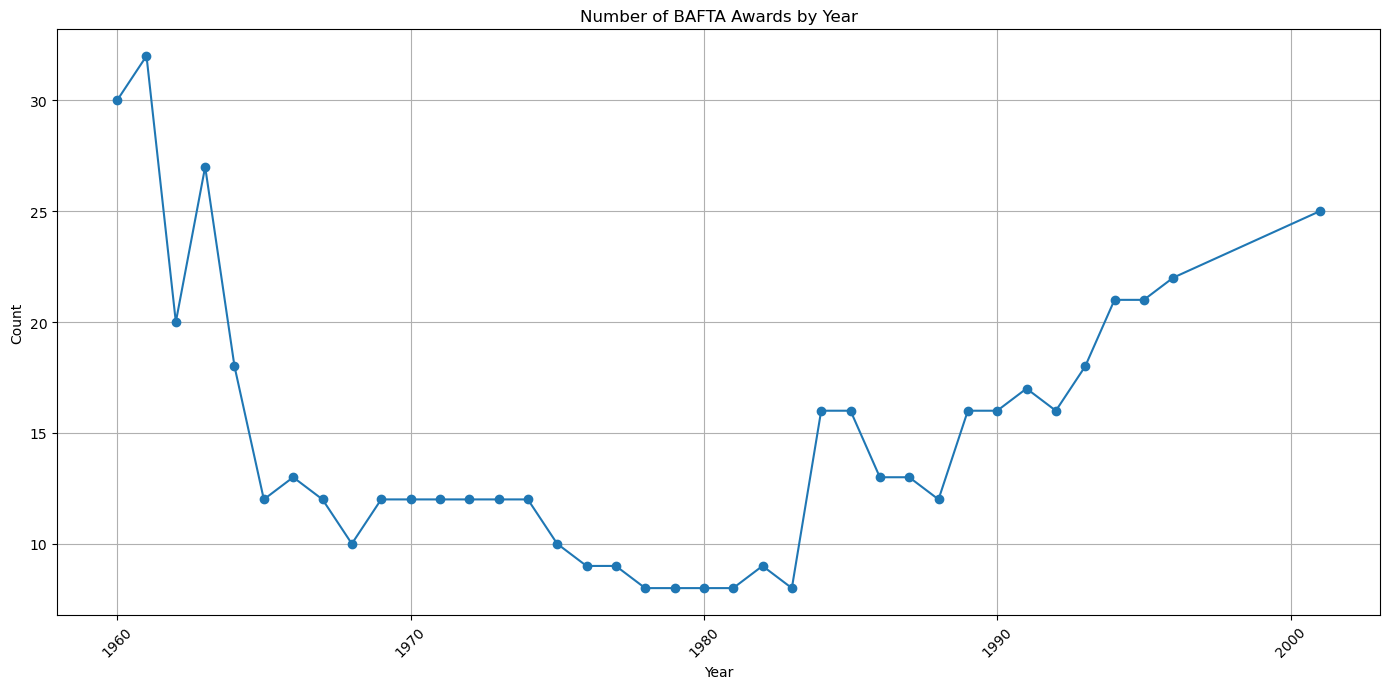

In [50]:
import matplotlib.pyplot as plt

# Assuming bafta_df is a DataFrame and 'year' is a column in that DataFrame.
# Group by 'year' and count the entries for each year.
tmp = bafta_df.groupby('year_award').size().reset_index(name='count')

# Plotting the data
plt.figure(figsize=(14, 7))  # Set the figure size as desired
plt.plot(tmp['year_award'], tmp['count'], marker='o')  # Plot with markers for each data point
plt.title('Number of BAFTA Awards by Year')  # Add a title to the plot
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.grid(True)  # Add a grid for easier readability
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot

**Comment:** missing data from 1996-2001, and 2002-2014

In [51]:
awards_df = pd.concat([golden_globe_df, oscar_df, bafta_df], axis=0).reset_index(drop=True)
awards_df['movie_name'] = awards_df['movie_name'].apply(lambda x: x.strip())

# Standardize nan-values
values_to_replace = ['{}', '[]', '', 'NA', 'N/A', '-', 'nan', '\\N']
replace_map = {value: np.nan for value in values_to_replace}
awards_df = awards_df.replace(replace_map)
awards_df = awards_df.applymap(lambda x: np.nan if x == [None] or x == [np.nan] else x)

awards_df.sort_values(by='movie_name').reset_index(drop=True)

,year_film,year_award,ceremony,category,win,movie_name,people,country,award
0,1986,1987,59,WRITING (Screenplay Written Directly for the S...,False,'Crocodile' Dundee,"[Ken Shadie, Paul Hogan, John Cornell]",NaN,Oscar / Academy Awards
1,1979,1980,52,WRITING (Screenplay Written Directly for the S...,False,...And Justice for All,"[Barry Levinson, Valerie Curtin]",NaN,Oscar / Academy Awards
2,2013,2014,86,WRITING (Adapted Screenplay),True,12 Years a Slave,[John Ridley],NaN,Oscar / Academy Awards
3,2013,2014,71,Best Screenplay - Motion Picture,False,12 Years a Slave,[John Ridley],NaN,Golden Globe
4,2010,2011,68,Best Screenplay - Motion Picture,False,127 Hours,"[Danny Boyle, Simon Beaufoy]",NaN,Golden Globe
...,...,...,...,...,...,...,...,...,...
1686,2005,2006,63,Best Screenplay - Motion Picture,False,and Good Luck Good Night,[George Clooney],NaN,Golden Globe
1687,1989,1990,47,Best Screenplay - Motion Picture,False,and Videotape Lies Sex,[Steven Soderbergh],NaN,Golden Globe
1688,1989,1990,62,WRITING (Screenplay Written Directly for the S...,False,"sex, lies, and videotape",[Steven Soderbergh],NaN,Oscar / Academy Awards
1689,1961,1962,19,Foreign Film - Foreign Language,False,Ánimas Trujano (The Important Man),[Ismael Rodríguez],[Mexico],Golden Globe


In [52]:
awards_df.to_excel('awards.xlsx')

### Scraper IMDb

In [53]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import quote

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
           'Content-Type': 'text/html; charset=UTF-8'}

parser = 'html.parser'

In [71]:
def extract_movie_info(soup):
    try:
        a_tag = soup.find('a', class_='ipc-metadata-list-summary-item__t')
    
        # Extracting movie ID and title
        href = a_tag['href']
        movie_id = href.split('/?ref')[0].split('/')[-1]
        movie_title = a_tag.text
    except:
        movie_id = None
        movie_title = None
        
    try:
        # Find the <span> tag containing the year
        year_span = soup.find('span', class_='ipc-metadata-list-summary-item__li')
        year = year_span.text if year_span else None
    except:
        year = None

    return movie_id, movie_title, year


def retrieve_imdb_key(movie_name):
    has_paranthesis = False
    
    if movie_name.find('(') != -1:
        has_paranthesis = True
        search_term = quote(movie_name.split('(')[0])
    else:    
        search_term = quote(movie_name)
    
    url = f'https://www.imdb.com/find/?q={search_term}'
    
    print(url)
    
    def request_soup(url):
        try:
            response = requests.get(url, headers=headers, timeout=10)
            response.raise_for_status()
        except:
            print(f'Error occured while scraping {url}')
            return None
        
        soup = BeautifulSoup(response.text, parser)
        return soup
    
    soup = request_soup(url)
    movie_id, movie_title, year = extract_movie_info(soup)
    
    if not movie_id or not movie_title and has_paranthesis:
        search_term = quote(movie_name.split('(')[1].replace(')',''))
        url = f'https://www.imdb.com/find/?q={search_term}'
        soup = request_soup(url)
        movie_id, movie_title, year = extract_movie_info(soup)
        
    
    return {'movie_name': movie_name, 'imdb_id': movie_id, 'imdb_name': movie_title, 'year': year}

In [72]:
retrieve_imdb_key('and Good Luck Good Night')

https://www.imdb.com/find/?q=and%20Good%20Luck%20Good%20Night


{'movie_name': 'and Good Luck Good Night',
 'imdb_id': 'tt0433383',
 'imdb_name': 'Good Night, and Good Luck.',
 'year': '2005'}

In [56]:
from concurrent.futures import ThreadPoolExecutor, as_completed

results = []
records = awards_df['movie_name'].tolist()
failed = 0

with ThreadPoolExecutor(max_workers=14) as executor:
    future_to_record = {executor.submit(retrieve_imdb_key, record): record for record in records}

    for future in as_completed(future_to_record):
        result = future.result()
        if result is not None:
            results.append(result)
        else:
            failed += 1

# Creating a new DataFrame from the processed data
imdb_results = pd.DataFrame(results)

https://www.imdb.com/find/?q=Doctor%20Zhivago
https://www.imdb.com/find/?q=The%20Agony%20and%20The%20Ecstasy
https://www.imdb.com/find/?q=The%20Collector
https://www.imdb.com/find/?q=A%20Patch%20of%20Blue
https://www.imdb.com/find/?q=The%20Slender%20Thread
https://www.imdb.com/find/?q=A%20Man%20for%20All%20Seasons
https://www.imdb.com/find/?q=The%20Sand%20Pebbles
https://www.imdb.com/find/?q=Who%27s%20Afraid%20of%20Virginia%20Woolf%3F
https://www.imdb.com/find/?q=Alfie%20%281966%29
https://www.imdb.com/find/?q=The%20%20The%20Russians%20Are%20Coming%20Russians%20Are%20Coming
https://www.imdb.com/find/?q=In%20the%20Heat%20of%20the%20Night
https://www.imdb.com/find/?q=Bonnie%20and%20Clyde
https://www.imdb.com/find/?q=The%20Fox
https://www.imdb.com/find/?q=The%20Graduate
https://www.imdb.com/find/?q=Guess%20Who%27s%20Coming%20To%20Dinner
https://www.imdb.com/find/?q=Charly
https://www.imdb.com/find/?q=The%20Fixer
https://www.imdb.com/find/?q=The%20Lion%20in%20Winter
https://www.imdb.com/fi

In [57]:
imdb_results

,movie_name,imdb_id,imdb_name,year
0,The Agony and The Ecstasy,tt0058886,The Agony and the Ecstasy,1965
1,The Collector,tt0844479,The Collector,2009
2,Doctor Zhivago,tt0059113,Doctor Zhivago,1965
3,The Sand Pebbles,tt0060934,The Sand Pebbles,1966
4,The Slender Thread,tt0059729,The Slender Thread,1965
...,...,...,...,...
1683,Billy Elliot,tt0249462,Billy Elliot,2000
1684,Malena,tt0213847,Malèna,2000
1685,Gladiator,tt0172495,Gladiator,2000
1686,O Brother Where Art Thou?,tt0190590,"O Brother, Where Art Thou?",2000


In [69]:
merge_df = pd.merge(left=awards_df, right=imdb_results, how='left', left_on='movie_name', right_on='movie_name')
merge_df = merge_df.drop_duplicates(subset=['year_film','year_film','ceremony','category','win','movie_name','award'], keep='first').reset_index(drop=True)
merge_df['year_film'] = merge_df['year_film'].astype(int)
merge_df['year'] = merge_df['year_film'].apply(lambda x: int(x) if not pd.isna(x) else x)
merge_df['year_check'] = merge_df.apply(lambda x: x['year_film'] == x['year'], axis=1)

In [70]:
merge_df.to_csv('Output/awards.csv')